<a href="https://colab.research.google.com/github/ummuhantk/Hiyerar-ik-K-meleme/blob/main/Memnuniyet_D%C3%BCzeyi_Hiyerar%C5%9Fik_K%C3%BCmeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f5930bcb4429>:91: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Yas'] = df['Yas'].replace({'18-24': 0, '25+': 1})
<ipython-input-1-f5930bcb4429>:92: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cinsiyet'] = df['Cinsiyet'].replace({'Kadin': 0, 'Erkek': 1})
<ipython-input-1-f5930bcb4429>:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

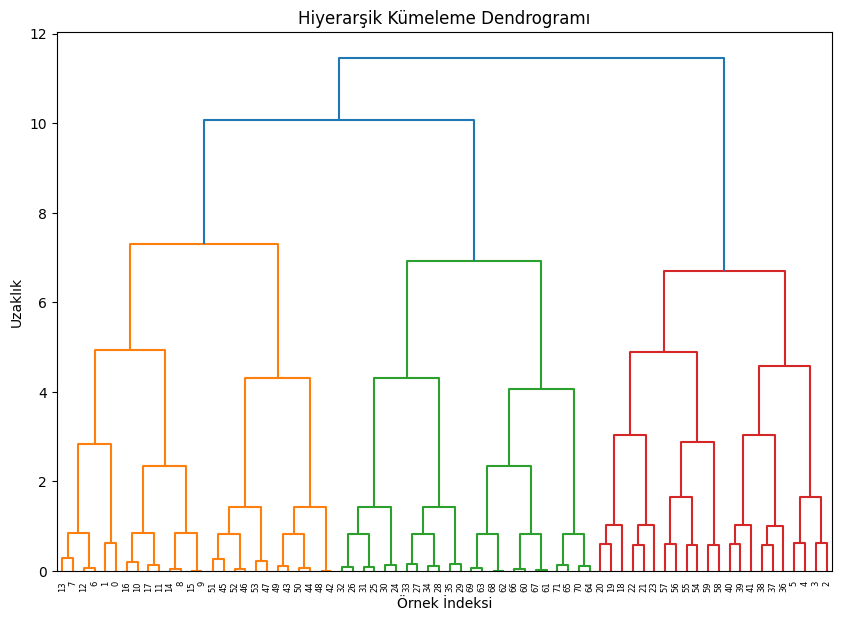

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
# CSV dosyasını oluşturma
data = """Yil,Yas,Cinsiyet,Memnuniyet,Yuzde
2018,18-24,Kadin,Memnun,73.79
2019,18-24,Kadin,Memnun,66.73
2020,18-24,Kadin,Memnun,80.35
2021,18-24,Kadin,Memnun,72.63
2022,18-24,Kadin,Memnun,82.16
2023,18-24,Kadin,Memnun,74.42
2018,18-24,Kadin,NeMemnunNeMemnunDegil,11.94
2019,18-24,Kadin,NeMemnunNeMemnunDegil,21.29
2020,18-24,Kadin,NeMemnunNeMemnunDegil,10.56
2021,18-24,Kadin,NeMemnunNeMemnunDegil,13.84
2022,18-24,Kadin,NeMemnunNeMemnunDegil,12.00
2023,18-24,Kadin,NeMemnunNeMemnunDegil,14.81
2018,18-24,Kadin,MemnunDegil,14.27
2019,18-24,Kadin,MemnunDegil,11.97
2020,18-24,Kadin,MemnunDegil,9.09
2021,18-24,Kadin,MemnunDegil,13.52
2022,18-24,Kadin,MemnunDegil,5.84
2023,18-24,Kadin,MemnunDegil,10.77
2018,25+,Kadin,Memnun,82.36
2019,25+,Kadin,Memnun,77.95
2020,25+,Kadin,Memnun,81.59
2021,25+,Kadin,Memnun,79.94
2022,25+,Kadin,Memnun,79.91
2023,25+,Kadin,Memnun,81.97
2018,25+,Kadin,NeMemnunNeMemnunDegil,11.10
2019,25+,Kadin,NeMemnunNeMemnunDegil,12.50
2020,25+,Kadin,NeMemnunNeMemnunDegil,10.79
2021,25+,Kadin,NeMemnunNeMemnunDegil,12.46
2022,25+,Kadin,NeMemnunNeMemnunDegil,11.98
2023,25+,Kadin,NeMemnunNeMemnunDegil,11.34
2018,25+,Kadin,MemnunDegil,6.53
2019,25+,Kadin,MemnunDegil,9.55
2020,25+,Kadin,MemnunDegil,7.62
2021,25+,Kadin,MemnunDegil,7.60
2022,25+,Kadin,MemnunDegil,8.11
2023,25+,Kadin,MemnunDegil,6.69
2018,18-24,Erkek,Memnun,77.15
2019,18-24,Erkek,Memnun,76.15
2020,18-24,Erkek,Memnun,75.86
2021,18-24,Erkek,Memnun,77.69
2022,18-24,Erkek,Memnun,82.50
2023,18-24,Erkek,Memnun,75.56
2018,18-24,Erkek,NeMemnunNeMemnunDegil,11.59
2019,18-24,Erkek,NeMemnunNeMemnunDegil,13.54
2020,18-24,Erkek,NeMemnunNeMemnunDegil,13.00
2021,18-24,Erkek,NeMemnunNeMemnunDegil,6.88
2022,18-24,Erkek,NeMemnunNeMemnunDegil,9.47
2023,18-24,Erkek,NeMemnunNeMemnunDegil,15.67
2018,18-24,Erkek,MemnunDegil,11.26
2019,18-24,Erkek,MemnunDegil,10.31
2020,18-24,Erkek,MemnunDegil,11.14
2021,18-24,Erkek,MemnunDegil,15.43
2022,18-24,Erkek,MemnunDegil,8.03
2023,18-24,Erkek,MemnunDegil,8.77
2018,25+,Erkek,Memnun,80.5
2019,25+,Erkek,Memnun,79.2
2020,25+,Erkek,Memnun,81.6
2021,25+,Erkek,Memnun,77.9
2022,25+,Erkek,Memnun,80.7
2023,25+,Erkek,Memnun,80.2
2018,25+,Erkek,NeMemnunNeMemnunDegil,9.0
2019,25+,Erkek,NeMemnunNeMemnunDegil,10.9
2020,25+,Erkek,NeMemnunNeMemnunDegil,9.3
2021,25+,Erkek,NeMemnunNeMemnunDegil,12.2
2022,25+,Erkek,NeMemnunNeMemnunDegil,11.4
2023,25+,Erkek,NeMemnunNeMemnunDegil,12.1
2018,25+,Erkek,MemnunDegil,10.5
2019,25+,Erkek,MemnunDegil,9.9
2020,25+,Erkek,MemnunDegil,9.2
2021,25+,Erkek,MemnunDegil,9.9
2022,25+,Erkek,MemnunDegil,7.9
2023,25+,Erkek,MemnunDegil,7.7"""

# CSV dosyasını kaydetme
with open('data.csv', 'w') as file:
    file.write(data)

# CSV dosyasını okuma
df = pd.read_csv('data.csv')



# Verileri temizleme ve düzenleme
df['Yas'] = df['Yas'].replace({'18-24': 0, '25+': 1})
df['Cinsiyet'] = df['Cinsiyet'].replace({'Kadin': 0, 'Erkek': 1})
df['Memnuniyet'] = df['Memnuniyet'].replace({'Memnun': 1, 'NeMemnunNeMemnunDegil': 0, 'MemnunDegil': -1})

# Standartlaştırma
X = df[['Yil', 'Yas', 'Cinsiyet', 'Yuzde']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiyerarşik kümeleme
linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hiyerarşik Kümeleme Dendrogramı')
plt.xlabel('Örnek İndeksi')
plt.ylabel('Uzaklık')
plt.show()
